# **Lab 12**: Practice Code for K-Mean Clustering

By: \\
*Prof. N. Hemachandra & R. Deval*

**Objective**: In this practice code, students can develop some basic understanding about using K-mean method to cluster given data set.

By: \\
*Prof. N. Hemachandra & R. Deval*



Link for [S1.txt](https://drive.google.com/file/d/1cHEkcSJByQIco_pIpZdRMD2Ixvk9HG8X/view?usp=sharing)

$\Large{\text{Clustering using K-Means}}$

Given data set $D=\{(x^i\}_{i=1}^{m}$ of points $x^i$, we wish to cluster these points into groups. The clustering should be done in such a way that the points belonging to the same group (or) cluster should be similar when compared to the points from other groups (or) clusters.


Given the number of clusters $K$, the clustering is achieved by finding a partition $(C_1,C_2,\ldots,C_K) \subseteq D^K$, such that the following objective is optimized:

$
\begin{align}
\min_{(C_1,C_2,\ldots,C_K) \subseteq D^K} \sum_{k=1}^{K} \sum_{x \in C_k} \|x-\frac{1}{|C_k|}\sum_{u \in C_k} u\|
\end{align}
$

This optimization algorithm can be equivalenty written as:
$
\begin{align}
\min_{(C_1,C_2,\ldots,C_K) \subseteq D^K} \sum_{k=1}^{K} \sum_{x \in C_k} \|x-\mu^k\|
\end{align}
$
where $\mu^k = \frac{1}{|C_k|}\sum_{u \in C_k} u$.

In general, solving this optimization problem is NP-hard. However an iterative technique called $K$-Means algorithm has been developed which can effectively cluster the points by finding a local optimum of the above optimization problem.

The idea of the algorithm is as follows:

*   Input: Data set $D=\{(x^i)\}_{i=1}^{m}$.
*   Start with a random initialization of means $(\mu^1,\mu^2,\ldots,\mu^K)$ (usually identified from the data set itself).
*   Repeat:
      1. Construct partitions $(C_1,C_2,\ldots,C_K)$ such that $C_j$ contains points from $D$ which are closer to $\mu^j, \forall j\in\{1,2\ldots,K\}$.
      2. Recompute means $\mu^j = \frac{1}{|C_j|} \sum_{x \in C_j} x, \forall j\in \{1,2,\ldots,K}$.

    Until partitions $(C_1,C_2,\ldots,C_K)$ do not change.




In [2]:
#importing the required packages
import pandas as pd
import numpy as np

In [3]:
#Please copy the 's1.txt' file to the current folder in colab
#read the txt file into a data frame
df= pd.read_csv('s1.txt', sep='    ',index_col=None,header = None)

<ipython-input-3-af1ed0443d7c>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df= pd.read_csv('s1.txt', sep='    ',index_col=None,header = None)


In [4]:
df

,0,1
0,664159,550946
1,665845,557965
2,597173,575538
3,618600,551446
4,635690,608046
...,...,...
4995,665426,853940
4996,691827,863963
4997,650661,861267
4998,599647,858702


In [5]:
df.head()

,0,1
0,664159,550946
1,665845,557965
2,597173,575538
3,618600,551446
4,635690,608046


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       5000 non-null   int64
 1   1       5000 non-null   int64
dtypes: int64(2)
memory usage: 78.2 KB


In [7]:
#plot the number of rows and columns in df
print('shape of data:(', len(df.index), len(df.columns),')')

shape of data:( 5000 2 )


<Axes: xlabel='0', ylabel='1'>

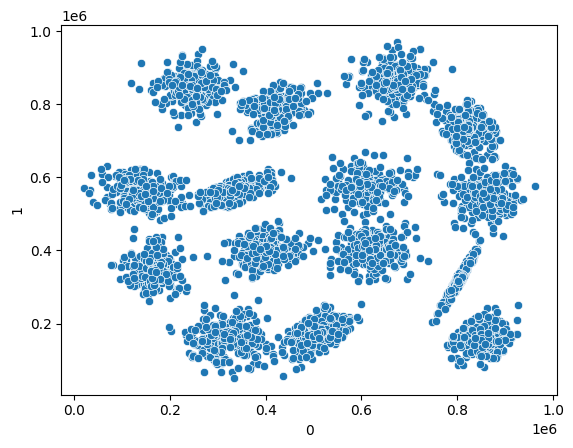

In [8]:
#since the data is 2D, let us do a scatter plot
import seaborn as sns
sns.scatterplot(x=df[0],y=df[1])

In [9]:
#Let us try to do a clustering of the given data using K-Means algorithm
#import K-Means library from scikit learn
from sklearn.cluster import KMeans

In [10]:
#first let us convert the dataframe to a nupy array since K-Means library from scikit learn accepts numpy arrays only
X = df.to_numpy()

In [11]:
X

array([[664159, 550946],
       [665845, 557965],
       [597173, 575538],
       ...,
       [650661, 861267],
       [599647, 858702],
       [684091, 842566]])

In [ ]:
#print the size of data
print('shape of data:', X.shape)

shape of data: (5000, 2)


In [ ]:
#check the contents of X
X

array([[664159, 550946],
       [665845, 557965],
       [597173, 575538],
       ...,
       [650661, 861267],
       [599647, 858702],
       [684091, 842566]])

In [12]:
km = KMeans(n_clusters=5, random_state=0)

In [13]:
#let us try to see what is available in km
km

KMeans(n_clusters=5, random_state=0)

In [15]:
km_result = km.fit(X)
km_result

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=0)

In [18]:
km_result.labels_

array([3, 3, 3, ..., 3, 3, 3], dtype=int32)

In [19]:
print(X[:,0].shape, X[:,1].shape, km_result.labels_.shape)

(5000,) (5000,) (5000,)


<Axes: >

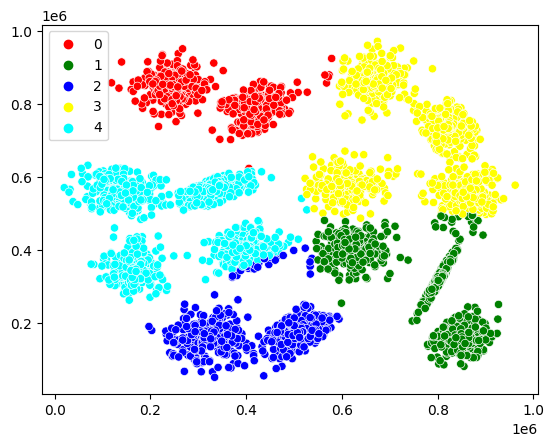

In [20]:
 sns.scatterplot(x=X[:,0],y=X[:,1],hue=km_result.labels_, palette=['red','green','blue','yellow','cyan'])

In [21]:
#what are the centers of the clusters?
km_result.cluster_centers_

array([[329618.53403933, 818757.64145235],
       [758509.36958711, 296336.26586102],
       [416482.98044693, 175519.96787709],
       [742481.33617351, 684525.73121611],
       [259047.72890216, 469522.58028379]])

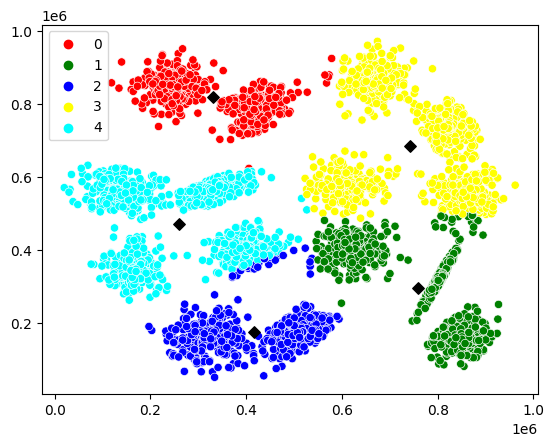

In [22]:
#plot these centers in the cluster plot
import matplotlib.pyplot as plt
sns.scatterplot(x=X[:,0],y=X[:,1],hue=km_result.labels_, palette=['red','green','blue','yellow','cyan'])
plt.scatter(x=km_result.cluster_centers_[:,0],y=km_result.cluster_centers_[:,1],color='black',marker="D", s=34)


In [23]:
#Suppose we have some new points which need to be identified with the clusters, then we can predict the cluster number as below
new_points = np.array([[540118, 671072], [507453, 777031], [569266, 738385], [444587, 878830], [434041, 814466]])
km_result.predict(new_points)

array([3, 0, 3, 0, 0], dtype=int32)

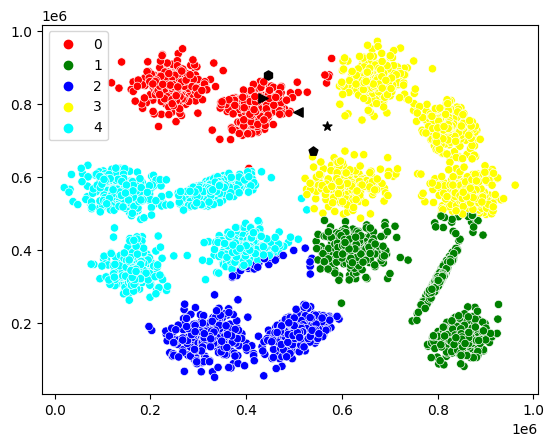

In [24]:
#plot these predictions for the new points in the cluster plot
import matplotlib.pyplot as plt
sns.scatterplot(x=X[:,0],y=X[:,1],hue=km_result.labels_, palette=['red','green','blue','yellow','cyan'])

markers=["p","<","*","h",">"]
for j in range(len(new_points)):
  plt.scatter(x=new_points[j,0],y=new_points[j,1],color='black',marker=markers[j], s=44)
